Backtrader allows us to define our trading strategy as a python class, and define some variables such as initial cash.

So we can test our strategy on historical data, and can know how profitable our strategy was, before we put that out in real world

In [74]:
from datetime import datetime
import backtrader as bt
import backtrader.analyzers as btanalyzers
from IPython.display import display, Image
import yfinance as yf

In [70]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 5]

In [7]:
class SmaCross(bt.Strategy):
    '''
    About this strategy
    This strategy is based on SMA , enabling Gunbot to buy when prices start moving up -
    indicated by fast SMA crossing over slow SMA . Selling takes place as soon as fast SMA crosses down slow SMA .
    '''
    # list of parameters which are configurable for the strategy
    params = dict(
        pfast=10,  # period for the fast moving average
        pslow=50   # period for the slow moving average
    )

    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                self.buy()  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position

In [8]:
class RSI(bt.Strategy):
    '''
    The Relative Strength Index (RSI) is one of the most popular indicators in the market.

    The RSI is a basic measure of how well a stock is performing against itself by comparing
    the strength of the up days versus the down days.  This number is computed and has a range between 0 and 100.
    A reading above 70 is considered bullish, while a reading below 30 is an indication of bearishness.
    '''

    def __init__(self):
        self.rsi = bt.indicators.RSI(self.data.close)

    def next(self):
        if not self.position: # no position yet
            if self.rsi < 30:
                self.order = self.buy()

        elif self.rsi > 70:
            self.order = self.sell()

The main control center of backtrader is called Cerebro. It connects together datafeed and strategy

In [76]:
# 2. define cerebro engine
cerebro = bt.Cerebro()

# import data from yahoofinance
data = bt.feeds.PandasData(dataname=yf.download('AAPL', '2010-01-01', '2020-01-01', auto_adjust=True))


# add data
cerebro.adddata(data)

# add strategy
# cerebro.addstrategy(SmaCross) 
cerebro.addstrategy(SmaCross) 

cerebro.broker.setcash(10000000)

# set for 30 weeks
cerebro.addsizer(bt.sizers.PercentSizer, percents = 10)

[*********************100%***********************]  1 of 1 completed


In [77]:
cerebro.addanalyzer(btanalyzers.SharpeRatio, _name = "sharpe")

Final Amount :  12120615.721172543 dollars
Profit :  21.206157211725433 %


<IPython.core.display.Javascript object>


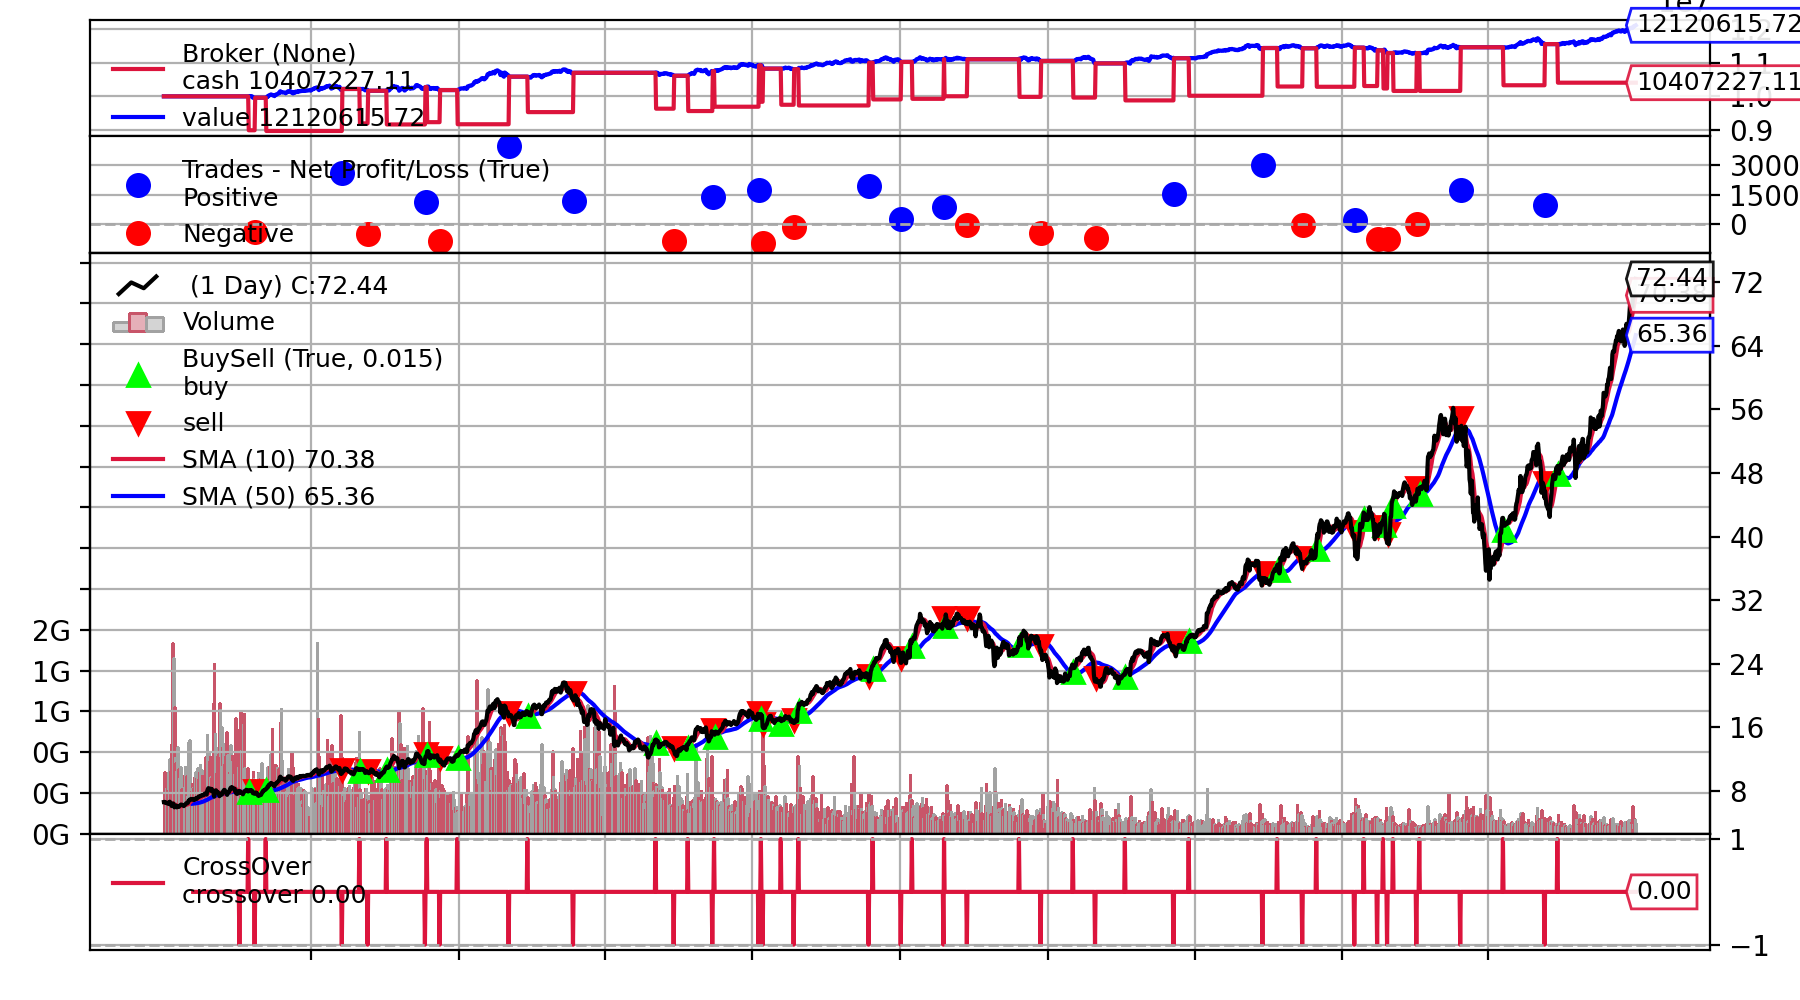

[[<Figure size 900x500 with 5 Axes>]]

In [78]:
# 3. run Cerebro

init_cash = cerebro.broker.getvalue()

cerebro.run()

final_cash = cerebro.broker.getvalue()

print("Final Amount : ", final_cash, "dollars")
print("Profit : ", float(final_cash - init_cash)/float(init_cash) * 100., "%")

# Display
cerebro.plot()


The plot provides us so much information about buying and selling points, PnL and trading colume

You can find a complete guide to backtrader and find much more examples at https://algotrading101.com/learn/backtrader-for-backtesting/